In [103]:
import kagglehub
import shutil
import os
# Download latest version
path = kagglehub.dataset_download("abecklas/fifa-world-cup")

destination = os.path.join(os.getcwd(), "soccer_dataset")

# Copy dataset files to local folder
shutil.copytree(path, destination, dirs_exist_ok=True)

print(f"Dataset saved locally in: {destination}")

Dataset saved locally in: /Users/tommykornfeld/Documents/projects/m50/soccer_dataset


In [ ]:
import kagglehub
import kagglehub
import shutil
import os
# Download latest version
path = kagglehub.dataset_download("martj42/international-football-results-from-1872-to-2017")

destination = os.path.join(os.getcwd(), "soccer_dataset")

# Copy dataset files to local folder
shutil.copytree(path, destination, dirs_exist_ok=True)

print(f"Dataset saved locally in: {destination}")

Dataset saved locally in: /Users/tommykornfeld/Documents/projects/m50/soccer_dataset


In [212]:
import math
from collections import defaultdict

class TeamElo:
    def __init__(self, teams_list, initial_rating=1500, k=32):
        self.initial_rating = initial_rating
        self.k = k
        self.ratings = {}
        for team in teams_list:
            self.ratings[team] = initial_rating

    def expected(self, rating_a, rating_b):
        return 1 / (1 + 10 ** ((rating_b - rating_a) / 400))

    def update(self, team_a, team_b, score_a, score_b):
        Ra = self.ratings[team_a]
        Rb = self.ratings[team_b]

        # actual outcomes (0, 0.5, 1)
        if score_a == score_b:
            Sa, Sb = 0.5, 0.5
        else:
            Sa = 1.0 if score_a > score_b else 0.0
            Sb = 1.0 - Sa

        Ea = self.expected(Ra, Rb)
        Eb = 1 - Ea

        # apply update
        new_Ra = Ra + self.k * (Sa - Ea)
        new_Rb = Rb + self.k * (Sb - Eb)

        self.ratings[team_a] = new_Ra
        self.ratings[team_b] = new_Rb

        return new_Ra, new_Rb

    def get(self, team):
        return self.ratings[team]


In [213]:
import pandas as pd
import sqlite3
import numpy as np

db_path = "soccer_dataset/results.csv"

df = pd.read_csv(db_path)


In [214]:
df_econ = pd.read_csv('soccer_dataset/gdp-per-capita-worldbank.csv')


In [215]:
df=df.dropna(subset=["home_team", "away_team", "home_score", "away_score", 'city'])

In [216]:
COUNTRY_CAPITAL_TIMEZONES = {
    "Afghanistan": ("Kabul", "Asia/Kabul"),
    "Albania": ("Tirana", "Europe/Tirane"),
    "Algeria": ("Algiers", "Africa/Algiers"),
    "Andorra": ("Andorra la Vella", "Europe/Andorra"),
    "Angola": ("Luanda", "Africa/Luanda"),
    "Antigua and Barbuda": ("Saint John's", "America/Antigua"),
    "Argentina": ("Buenos Aires", "America/Argentina/Buenos_Aires"),
    "Armenia": ("Yerevan", "Asia/Yerevan"),
    "Australia": ("Canberra", "Australia/Sydney"),     # ACT uses Sydney zone
    "Austria": ("Vienna", "Europe/Vienna"),
    "Azerbaijan": ("Baku", "Asia/Baku"),
    "Bahamas": ("Nassau", "America/Nassau"),
    "Bahrain": ("Manama", "Asia/Bahrain"),
    "Bangladesh": ("Dhaka", "Asia/Dhaka"),
    "Barbados": ("Bridgetown", "America/Barbados"),
    "Belarus": ("Minsk", "Europe/Minsk"),
    "Belgium": ("Brussels", "Europe/Brussels"),
    "Belize": ("Belmopan", "America/Belize"),
    "Benin": ("Porto-Novo", "Africa/Porto-Novo"),
    "Bhutan": ("Thimphu", "Asia/Thimphu"),
    "Bolivia": ("Sucre", "America/La_Paz"),  # La Paz timezone used
    "Bosnia and Herzegovina": ("Sarajevo", "Europe/Sarajevo"),
    "Botswana": ("Gaborone", "Africa/Gaborone"),
    "Brazil": ("Brasília", "America/Sao_Paulo"),
    "Brunei": ("Bandar Seri Begawan", "Asia/Brunei"),
    "Bulgaria": ("Sofia", "Europe/Sofia"),
    "Burkina Faso": ("Ouagadougou", "Africa/Ouagadougou"),
    "Burundi": ("Gitega", "Africa/Bujumbura"),
    "Cabo Verde": ("Praia", "Atlantic/Cape_Verde"),
    "Cambodia": ("Phnom Penh", "Asia/Phnom_Penh"),
    "Cameroon": ("Yaoundé", "Africa/Douala"),
    "Canada": ("Ottawa", "America/Toronto"),
    "Central African Republic": ("Bangui", "Africa/Bangui"),
    "Chad": ("N'Djamena", "Africa/Ndjamena"),
    "Chile": ("Santiago", "America/Santiago"),
    "China": ("Beijing", "Asia/Shanghai"),
    "Colombia": ("Bogotá", "America/Bogota"),
    "Comoros": ("Moroni", "Indian/Comoro"),
    "Congo (Republic of the)": ("Brazzaville", "Africa/Brazzaville"),
    "Congo (Democratic Republic of the)": ("Kinshasa", "Africa/Kinshasa"),
    "Costa Rica": ("San José", "America/Costa_Rica"),
    "Côte d'Ivoire": ("Yamoussoukro", "Africa/Abidjan"),
    "Croatia": ("Zagreb", "Europe/Zagreb"),
    "Cuba": ("Havana", "America/Havana"),
    "Cyprus": ("Nicosia", "Asia/Nicosia"),
    "Czech Republic": ("Prague", "Europe/Prague"),
    "Denmark": ("Copenhagen", "Europe/Copenhagen"),
    "Djibouti": ("Djibouti", "Africa/Djibouti"),
    "Dominica": ("Roseau", "America/Dominica"),
    "Dominican Republic": ("Santo Domingo", "America/Santo_Domingo"),
    "Ecuador": ("Quito", "America/Guayaquil"),
    "Egypt": ("Cairo", "Africa/Cairo"),
    "El Salvador": ("San Salvador", "America/El_Salvador"),
    "Equatorial Guinea": ("Malabo", "Africa/Malabo"),
    "Eritrea": ("Asmara", "Africa/Asmara"),
    "Estonia": ("Tallinn", "Europe/Tallinn"),
    "Eswatini": ("Mbabane", "Africa/Mbabane"),
    "Ethiopia": ("Addis Ababa", "Africa/Addis_Ababa"),
    "Fiji": ("Suva", "Pacific/Fiji"),
    "Finland": ("Helsinki", "Europe/Helsinki"),
    "France": ("Paris", "Europe/Paris"),
    "Gabon": ("Libreville", "Africa/Libreville"),
    "Gambia": ("Banjul", "Africa/Banjul"),
    "Georgia": ("Tbilisi", "Asia/Tbilisi"),
    "Germany": ("Berlin", "Europe/Berlin"),
    "Ghana": ("Accra", "Africa/Accra"),
    "Greece": ("Athens", "Europe/Athens"),
    "Grenada": ("Saint George's", "America/Grenada"),
    "Guatemala": ("Guatemala City", "America/Guatemala"),
    "Guinea": ("Conakry", "Africa/Conakry"),
    "Guinea-Bissau": ("Bissau", "Africa/Bissau"),
    "Guyana": ("Georgetown", "America/Guyana"),
    "Haiti": ("Port-au-Prince", "America/Port-au-Prince"),
    "Honduras": ("Tegucigalpa", "America/Tegucigalpa"),
    "Hungary": ("Budapest", "Europe/Budapest"),
    "Iceland": ("Reykjavík", "Atlantic/Reykjavik"),
    "India": ("New Delhi", "Asia/Kolkata"),
    "Indonesia": ("Jakarta", "Asia/Jakarta"),
    "Iran": ("Tehran", "Asia/Tehran"),
    "Iraq": ("Baghdad", "Asia/Baghdad"),
    "Ireland": ("Dublin", "Europe/Dublin"),
    "Israel": ("Jerusalem", "Asia/Jerusalem"),
    "Italy": ("Rome", "Europe/Rome"),
    "Jamaica": ("Kingston", "America/Jamaica"),
    "Japan": ("Tokyo", "Asia/Tokyo"),
    "Jordan": ("Amman", "Asia/Amman"),
    "Kazakhstan": ("Astana", "Asia/Almaty"),
    "Kenya": ("Nairobi", "Africa/Nairobi"),
    "Kiribati": ("South Tarawa", "Pacific/Tarawa"),
    "Kuwait": ("Kuwait City", "Asia/Kuwait"),
    "Kyrgyzstan": ("Bishkek", "Asia/Bishkek"),
    "Laos": ("Vientiane", "Asia/Vientiane"),
    "Latvia": ("Riga", "Europe/Riga"),
    "Lebanon": ("Beirut", "Asia/Beirut"),
    "Lesotho": ("Maseru", "Africa/Maseru"),
    "Liberia": ("Monrovia", "Africa/Monrovia"),
    "Libya": ("Tripoli", "Africa/Tripoli"),
    "Liechtenstein": ("Vaduz", "Europe/Vaduz"),
    "Lithuania": ("Vilnius", "Europe/Vilnius"),
    "Luxembourg": ("Luxembourg", "Europe/Luxembourg"),
    "Madagascar": ("Antananarivo", "Indian/Antananarivo"),
    "Malawi": ("Lilongwe", "Africa/Blantyre"),
    "Malaysia": ("Kuala Lumpur", "Asia/Kuala_Lumpur"),
    "Maldives": ("Malé", "Indian/Maldives"),
    "Mali": ("Bamako", "Africa/Bamako"),
    "Malta": ("Valletta", "Europe/Malta"),
    "Marshall Islands": ("Majuro", "Pacific/Majuro"),
    "Mauritania": ("Nouakchott", "Africa/Nouakchott"),
    "Mauritius": ("Port Louis", "Indian/Mauritius"),
    "Mexico": ("Mexico City", "America/Mexico_City"),
    "Micronesia": ("Palikir", "Pacific/Pohnpei"),
    "Moldova": ("Chișinău", "Europe/Chisinau"),
    "Monaco": ("Monaco", "Europe/Monaco"),
    "Mongolia": ("Ulaanbaatar", "Asia/Ulaanbaatar"),
    "Montenegro": ("Podgorica", "Europe/Podgorica"),
    "Morocco": ("Rabat", "Africa/Casablanca"),
    "Mozambique": ("Maputo", "Africa/Maputo"),
    "Myanmar": ("Naypyidaw", "Asia/Yangon"),
    "Namibia": ("Windhoek", "Africa/Windhoek"),
    "Nauru": ("Yaren", "Pacific/Nauru"),
    "Nepal": ("Kathmandu", "Asia/Kathmandu"),
    "Netherlands": ("Amsterdam", "Europe/Amsterdam"),
    "New Zealand": ("Wellington", "Pacific/Auckland"),
    "Nicaragua": ("Managua", "America/Managua"),
    "Niger": ("Niamey", "Africa/Niamey"),
    "Nigeria": ("Abuja", "Africa/Lagos"),
    "North Korea": ("Pyongyang", "Asia/Pyongyang"),
    "North Macedonia": ("Skopje", "Europe/Skopje"),
    "Norway": ("Oslo", "Europe/Oslo"),
    "Oman": ("Muscat", "Asia/Muscat"),
    "Pakistan": ("Islamabad", "Asia/Karachi"),
    "Palau": ("Ngerulmud", "Pacific/Palau"),
    "Panama": ("Panama City", "America/Panama"),
    "Papua New Guinea": ("Port Moresby", "Pacific/Port_Moresby"),
    "Paraguay": ("Asunción", "America/Asuncion"),
    "Peru": ("Lima", "America/Lima"),
    "Philippines": ("Manila", "Asia/Manila"),
    "Poland": ("Warsaw", "Europe/Warsaw"),
    "Portugal": ("Lisbon", "Europe/Lisbon"),
    "Qatar": ("Doha", "Asia/Qatar"),
    "Romania": ("Bucharest", "Europe/Bucharest"),
    "Russia": ("Moscow", "Europe/Moscow"),
    "Rwanda": ("Kigali", "Africa/Kigali"),
    "Saint Kitts and Nevis": ("Basseterre", "America/St_Kitts"),
    "Saint Lucia": ("Castries", "America/St_Lucia"),
    "Saint Vincent and the Grenadines": ("Kingstown", "America/St_Vincent"),
    "Samoa": ("Apia", "Pacific/Apia"),
    "San Marino": ("San Marino", "Europe/San_Marino"),
    "Sao Tome and Principe": ("São Tomé", "Africa/Sao_Tome"),
    "Saudi Arabia": ("Riyadh", "Asia/Riyadh"),
    "Senegal": ("Dakar", "Africa/Dakar"),
    "Serbia": ("Belgrade", "Europe/Belgrade"),
    "Seychelles": ("Victoria", "Indian/Mahe"),
    "Sierra Leone": ("Freetown", "Africa/Freetown"),
    "Singapore": ("Singapore", "Asia/Singapore"),
    "Slovakia": ("Bratislava", "Europe/Bratislava"),
    "Slovenia": ("Ljubljana", "Europe/Ljubljana"),
    "Solomon Islands": ("Honiara", "Pacific/Guadalcanal"),
    "Somalia": ("Mogadishu", "Africa/Mogadishu"),
    "South Africa": ("Pretoria", "Africa/Johannesburg"),
    "South Korea": ("Seoul", "Asia/Seoul"),
    "South Sudan": ("Juba", "Africa/Juba"),
    "Spain": ("Madrid", "Europe/Madrid"),
    "Sri Lanka": ("Sri Jayawardenepura Kotte", "Asia/Colombo"),
    "Sudan": ("Khartoum", "Africa/Khartoum"),
    "Suriname": ("Paramaribo", "America/Paramaribo"),
    "Sweden": ("Stockholm", "Europe/Stockholm"),
    "Switzerland": ("Bern", "Europe/Zurich"),
    "Syria": ("Damascus", "Asia/Damascus"),
    "Taiwan": ("Taipei", "Asia/Taipei"),
    "Tajikistan": ("Dushanbe", "Asia/Dushanbe"),
    "Tanzania": ("Dodoma", "Africa/Dar_es_Salaam"),
    "Thailand": ("Bangkok", "Asia/Bangkok"),
    "Timor-Leste": ("Dili", "Asia/Dili"),
    "Togo": ("Lomé", "Africa/Lome"),
    "Tonga": ("Nukuʻalofa", "Pacific/Tongatapu"),
    "Trinidad and Tobago": ("Port of Spain", "America/Port_of_Spain"),
    "Tunisia": ("Tunis", "Africa/Tunis"),
    "Turkey": ("Ankara", "Europe/Istanbul"),
    "Turkmenistan": ("Ashgabat", "Asia/Ashgabat"),
    "Tuvalu": ("Funafuti", "Pacific/Funafuti"),
    "Uganda": ("Kampala", "Africa/Kampala"),
    "Ukraine": ("Kyiv", "Europe/Kyiv"),
    "United Arab Emirates": ("Abu Dhabi", "Asia/Dubai"),
    "United Kingdom": ("London", "Europe/London"),
    "United States": ("Washington, D.C.", "America/New_York"),
    "Uruguay": ("Montevideo", "America/Montevideo"),
    "Uzbekistan": ("Tashkent", "Asia/Tashkent"),
    "Vanuatu": ("Port Vila", "Pacific/Efate"),
    "Vatican City": ("Vatican City", "Europe/Vatican"),
    "Venezuela": ("Caracas", "America/Caracas"),
    "Vietnam": ("Hanoi", "Asia/Bangkok"),  # Hanoi uses Indochina TZ
    "Yemen": ("Sanaa", "Asia/Aden"),
    "Zambia": ("Lusaka", "Africa/Lusaka"),
    "Zimbabwe": ("Harare", "Africa/Harare"),
}


In [217]:
from datetime import datetime
import pytz
from rapidfuzz import process, fuzz


def fuzzy_match_country(country_input: str, choices: dict, threshold: int = 70):
    """
    Returns the best fuzzy match for the country name if above threshold.
    """
    match, score, _ = process.extractOne(
        country_input,
        choices.keys(),
        scorer=fuzz.WRatio
    )
    if score >= threshold:
        return match
    raise KeyError(f"No sufficiently close match found for '{country_input}' (best score={score}).")

def fuzzy_match_gdp(country_input: str, year: int, df_econ: pd.DataFrame, threshold: int = 70):
    """
    Returns the GDP per capita for the best fuzzy matched country name if above threshold.
    """
    match, score, _ = process.extractOne(
        country_input,
        df_econ['Entity'].unique(),
        scorer=fuzz.WRatio
    )
    if score >= threshold:
        gdp_value = df_econ[(df_econ['Year'] == year) & (df_econ['Entity'] == match)]["GDP per capita, PPP (constant 2021 international $)"].values
        if len(gdp_value) > 0:
            return gdp_value[0]
        else:
            raise KeyError(f"No GDP data found for '{match}' in year {year}.")
    raise KeyError(f"No sufficiently close match found for '{country_input}' (best score={score}).")    

def get_capital_timezone(country_input: str):
    """
    Takes an imperfect country name and a datetime string, returns:
    - pytz timezone object
    - localized datetime
    """
    # Fuzzy match the country[
    country = fuzzy_match_country(country_input, COUNTRY_CAPITAL_TIMEZONES)

    capital, tz_name = COUNTRY_CAPITAL_TIMEZONES[country]
    return pytz.timezone(tz_name)


get_capital_timezone("Russian Federation")

<DstTzInfo 'Europe/Moscow' LMT+2:30:00 STD>

In [218]:
import pandas as pd

cities = pd.read_csv(
    "cities15000.txt",
    sep="\t",
    header=None,
    names=[
        "geonameid", "name", "asciiname", "alternatenames",
        "lat", "lon", "feature_class", "feature_code",
        "country_code", "cc2", "admin1", "admin2",
        "admin3", "admin4", "population",
        "elevation", "dem", "timezone", "modification_date"
    ],
    encoding="utf-8"
)


In [219]:
cities = cities.dropna(subset=["name"])

In [220]:
def get_city_timezone(city_name):
    # Convert city_name to string in case it's a float or NaN
    # print("started lookup")
    city_name_str = str(city_name)
    score_threshold = 60
    
    # Case-insensitive match, safely handling NaNs in the DataFrame
    city_names = cities["name"].fillna("").str.strip()

    # Find the best fuzzy match
    best_match = process.extractOne(
        city_name_str.strip(),  # input city
        city_names,             # choices
        scorer=fuzz.ratio       # similarity metric
    )

    if best_match is None or best_match[1] < score_threshold:
        # No good match found
        return None

    # Get the matched city name
    matched_name = best_match[0]

    # Filter all rows that match this name (case-insensitive & stripped)
    matches = cities[
        cities["name"].fillna("").str.strip().str.lower() == matched_name.strip().lower()
    ]    # If matches exist, pick the row(s) with the maximum population
    if not matches.empty:
        matches = matches[matches["population"] == matches["population"].max()]
    
        tz_name = matches.iloc[0]["timezone"]
        # print(f"Found timezone '{tz_name}' for city '{city_name_str}'")
        return pytz.timezone(tz_name)
    # else:
        # print(f"City not found: {city_name_str}")



In [221]:
from datetime import datetime
import pytz


def subtract_two_timezones(tz1, tz2, dt):
    """
    Subtracts two pytz timezone objects to find the time difference at a given datetime.
    """
    if tz1 is None or tz2 is None:
        print(tz1, tz2)
        raise ValueError("Both timezone objects must be valid.")
    offset1 = tz1.utcoffset(dt)
    offset2 = tz2.utcoffset(dt)
    delta = offset2 - offset1
    return delta.total_seconds() / 3600

subtract_two_timezones(get_city_timezone("New York"), get_capital_timezone("South Africa"), datetime.utcnow())

7.0

In [222]:
import tqdm

def compute_time_diffs(row):
    # extract columns safely (replace/extend these with the real logic you need)
    stadium = row.get("city", 0)
    
    if stadium == "Nelson Mandela Bay/Port Elizabeth ":
        stadium = "Pretoria"
        
    home_team = row.get("home_team", 0)
    if home_team == "USA":
        home_team = "United States"
    away_team = row.get("away_team", 0)
    dt = pd.Timestamp(row.get("Datetime",0))
    if home_team == "USA":
        home_team = "United States"
    
    if away_team == "USA":
        away_team = "United States"

    if home_team == "Soviet Union":
        home_team = "Russian Federation"
    
    if away_team == "Soviet Union":
        away_team = "Russian Federation"

    if home_team == "Wales":
        home_team = "United Kingdom"

    if away_team == "Wales":
        away_team = "United Kingdom"

    if home_team == "Korea DPR":
        home_team = "North Korea"

    if away_team == "Korea DPR":
        away_team = "North Korea"

    if home_team == "Korea Republic":
        home_team = "South Korea"

    if away_team == "Korea Republic":
        away_team = "South Korea"

    if home_team == "Czechia":
        home_team = "Czech Republic"

    if away_team == "Czechia":
        away_team = "Czech Republic"
    
    if home_team == "Zaire":
        home_team = "Democratic Republic of the Congo"

    if away_team == "Zaire":
        away_team = "Democratic Republic of the Congo"
    # print(stadium, home_team, away_team, dt)

    try:
        stadium_tz = get_city_timezone(stadium)
    except Exception as e:
        print("stadium", e)
    try:
        home_team_tz = get_capital_timezone(home_team)
        away_team_tz = get_capital_timezone(away_team)
    except Exception as e:
        pass
        # print("team", e)


    return home_team, away_team, subtract_two_timezones(stadium_tz, home_team_tz, dt), subtract_two_timezones(stadium_tz, away_team_tz, dt)




In [223]:
for index, row in tqdm.tqdm(df.iterrows(), total=len(df), desc="Processing rows"):
    try:
       home_team, away_team, home_diff, away_diff = compute_time_diffs(row)
    except Exception as e:
        continue
        # print(f"Error processing row {index}: {e}")
        # print(e)        
    # print(home_team, home_diff)
    # print(away_team, away_diff)
    df.loc[index, "home_time_diff"] = home_diff
    df.loc[index, "away_time_diff"] = away_diff

Processing rows:   2%|▏         | 859/48673 [00:08<07:14, 110.03it/s]

None Europe/Warsaw


Processing rows:   2%|▏         | 1144/48673 [00:10<07:15, 109.05it/s]

None Europe/Warsaw


Processing rows:   4%|▍         | 1943/48673 [00:18<07:03, 110.29it/s]

None Europe/Warsaw


Processing rows:  29%|██▉       | 14240/48673 [02:16<05:35, 102.69it/s]

None America/Grenada


Processing rows:  39%|███▉      | 19068/48673 [03:04<04:47, 103.15it/s]

None Asia/Baku


Processing rows:  47%|████▋     | 22973/48673 [03:42<04:15, 100.72it/s]

None Asia/Baku


Processing rows:  48%|████▊     | 23235/48673 [03:45<04:17, 98.81it/s] 

None Asia/Baku


Processing rows:  49%|████▉     | 24050/48673 [03:53<03:53, 105.67it/s]

None America/St_Lucia
None America/St_Lucia


Processing rows:  52%|█████▏    | 25407/48673 [04:06<03:40, 105.50it/s]

None America/Havana
None America/Havana


Processing rows:  55%|█████▍    | 26561/48673 [04:18<03:39, 100.86it/s]

None America/St_Lucia
None America/St_Lucia


Processing rows:  55%|█████▌    | 26771/48673 [04:20<03:43, 98.21it/s] 

None America/St_Lucia
None America/St_Lucia


Processing rows:  58%|█████▊    | 28039/48673 [04:33<03:16, 104.82it/s]

None America/St_Lucia


Processing rows:  58%|█████▊    | 28366/48673 [04:36<03:19, 101.98it/s]

None America/St_Lucia


Processing rows:  59%|█████▉    | 28886/48673 [04:41<03:21, 98.24it/s] 

None America/St_Lucia


Processing rows:  60%|█████▉    | 29163/48673 [04:44<03:17, 98.79it/s] 

None Europe/Monaco


Processing rows:  61%|██████▏   | 29819/48673 [04:51<03:05, 101.86it/s]

None Europe/Monaco


Processing rows:  65%|██████▍   | 31588/48673 [05:08<02:47, 101.78it/s]

None Africa/Luanda


Processing rows:  65%|██████▌   | 31775/48673 [05:10<02:48, 100.19it/s]

None Europe/Bratislava
None America/St_Lucia


Processing rows:  66%|██████▌   | 32216/48673 [05:15<02:35, 105.64it/s]

None Africa/Algiers


Processing rows:  67%|██████▋   | 32656/48673 [05:19<02:43, 98.12it/s] 

None Europe/Monaco


Processing rows:  67%|██████▋   | 32769/48673 [05:21<02:38, 100.65it/s]

None Africa/Luanda


Processing rows:  69%|██████▉   | 33798/48673 [05:31<02:28, 100.40it/s]

None Asia/Baku


Processing rows:  70%|██████▉   | 33942/48673 [05:32<02:31, 97.55it/s] 

None America/St_Kitts


Processing rows:  70%|██████▉   | 34007/48673 [05:33<02:23, 102.10it/s]

None America/St_Lucia
None America/St_Lucia


Processing rows:  70%|███████   | 34115/48673 [05:34<02:22, 101.90it/s]

None America/St_Lucia
None Africa/Luanda
None America/St_Kitts


Processing rows:  76%|███████▌  | 37052/48673 [06:04<01:51, 103.80it/s]

None Europe/Monaco


Processing rows:  78%|███████▊  | 37965/48673 [06:13<01:41, 105.63it/s]

None Europe/Vilnius


Processing rows:  79%|███████▉  | 38621/48673 [06:19<01:35, 105.37it/s]

None America/Grenada
None America/St_Lucia
None America/St_Lucia
None Africa/Windhoek
None Africa/Harare
None Africa/Windhoek
None Indian/Mahe
None Africa/Windhoek
None Africa/Maseru
None Africa/Johannesburg


Processing rows:  79%|███████▉  | 38656/48673 [06:19<01:29, 111.46it/s]

None Africa/Lusaka
None Africa/Johannesburg
None Africa/Lusaka
None Africa/Gaborone
None Africa/Windhoek
None Indian/Antananarivo
None Africa/Windhoek


Processing rows:  89%|████████▊ | 43083/48673 [07:03<00:54, 102.59it/s]

None America/St_Kitts


Processing rows:  90%|█████████ | 43915/48673 [07:12<00:48, 97.76it/s] 

None Europe/Bratislava


Processing rows:  93%|█████████▎| 45430/48673 [07:27<00:32, 100.92it/s]

None Africa/Johannesburg
None Africa/Gaborone
None Africa/Johannesburg
None Africa/Maputo
None Africa/Windhoek


Processing rows:  94%|█████████▍| 45812/48673 [07:31<00:40, 71.51it/s] 

None America/St_Kitts


Processing rows:  99%|█████████▉| 48207/48673 [07:55<00:04, 101.90it/s]

None Africa/Luanda


Processing rows: 100%|██████████| 48673/48673 [08:00<00:00, 101.34it/s]


In [224]:
df_econ.Year.min()

np.int64(1990)

In [225]:
for index, row in df.iterrows():

    # df.loc[index, 'total_time_diff'] = abs(abs(row['home_time_diff']) - abs(row['away_time_diff']))
    if row["home_time_diff"] > 12:
        correct_home_time = row["home_time_diff"] - 24
        df.loc[index, "home_time_diff"] = correct_home_time

    elif row["home_time_diff"] < -12:
        correct_home_time = row["home_time_diff"] + 24
        df.loc[index, "home_time_diff"] = correct_home_time
        
    if row["away_time_diff"] > 12:
        correct_away_time = row["away_time_diff"] - 24
        df.loc[index, "away_time_diff"] = correct_away_time
    elif row["away_time_diff"] < -12:
        correct_away_time = row["away_time_diff"] + 24
        df.loc[index, "away_time_diff"] = correct_away_time
        


In [240]:
from random import random

split = np.zeros(len(df), dtype=bool)
split[:len(df)//2] = True  # half True
split = np.random.permutation(split)  # shuffle randomly

# Step 2: assign to a new column
df['split'] = split

for index, row in df.iterrows():
    year_date = int(row["date"][0:4])
    # if year_date >= 1990:
    try:

        if row['split']:
            df.loc[index, 'team_1'] = df.loc[index, 'home_team']
            df.loc[index, 'team_2'] = df.loc[index, 'away_team']
            df.loc[index, 'team_1_score'] = row["home_score"]
            df.loc[index, 'team_2_score'] = row["away_score"]

            df.loc[index, 'p_score'] = (row["home_score"] + 1) /(row["home_score"] + row["away_score"]+2)
            df.loc[index, 'team_1_time_diff'] = abs(row['home_time_diff'])
            df.loc[index, 'team_2_time_diff'] = abs(row['away_time_diff'])
            df.loc[index, 'team_1_gdp'] = fuzzy_match_gdp(row['home_team'], year_date, df_econ)
            df.loc[index, 'team_2_gdp'] = fuzzy_match_gdp(row['away_team'], year_date, df_econ)

            # print(f"Unusual time diff in row {index}: {row['home_time_diff']}, {row['away_time_diff']}")
        else:
            df.loc[index, 'team_2'] = df.loc[index, 'home_team']
            df.loc[index, 'team_1'] = df.loc[index, 'away_team']
            df.loc[index, 'team_2_score'] = row["home_score"]
            df.loc[index, 'team_1_score'] = row["away_score"]
            df.loc[index, 'p_score'] = (row["away_score"] + 1) /(row["home_score"] + row["away_score"]+2)

            df.loc[index, 'team_1_time_diff'] = abs(row['away_time_diff'])
            df.loc[index, 'team_2_time_diff'] = abs(row['home_time_diff'])
            df.loc[index, 'team_1_gdp'] = fuzzy_match_gdp(row['away_team'], year_date, df_econ)
            df.loc[index, 'team_2_gdp'] = fuzzy_match_gdp(row['home_team'], year_date, df_econ)
    except Exception as e:
        print(f"Error processing economic data for row {index}: {e}")
        continue


Error processing economic data for row 0: "No GDP data found for 'Finland' in year 1872."
Error processing economic data for row 1: "No GDP data found for 'Poland' in year 1873."
Error processing economic data for row 2: "No GDP data found for 'Poland' in year 1874."
Error processing economic data for row 3: "No GDP data found for 'Finland' in year 1875."
Error processing economic data for row 4: "No GDP data found for 'Poland' in year 1876."
Error processing economic data for row 5: "No GDP data found for 'Palestine' in year 1876."
Error processing economic data for row 6: "No GDP data found for 'Poland' in year 1877."
Error processing economic data for row 7: "No GDP data found for 'Palestine' in year 1877."
Error processing economic data for row 8: "No GDP data found for 'Poland' in year 1878."
Error processing economic data for row 9: "No GDP data found for 'Palestine' in year 1878."
Error processing economic data for row 10: "No GDP data found for 'Palestine' in year 1879."
Error 

In [241]:
# elo_sys = TeamElo()
teams_list = np.union1d(df['home_team'].unique(), df['away_team'].unique())
elo_sys = TeamElo(teams_list)
for index, row in tqdm.tqdm(df.iterrows(), total=len(df), desc="ELO Data"):
    try:
        team_1 = row['team_1']
        team_2 = row['team_2']
        team_1_score = row['team_1_score']
        team_2_score = row['team_2_score']
        # print(team_1, team_2, team_1_score, team_2_score)
        df.loc[index, "team_1_elo"] = elo_sys.get(team_1)
        df.loc[index, "team_2_elo"] = elo_sys.get(team_2)

        elo_sys.update(team_1, team_2, team_1_score, team_2_score)
    except Exception as e:
        # print(f"Error processing ELO for row {index}: {e}")
        continue


ELO Data: 100%|██████████| 48673/48673 [00:04<00:00, 10864.11it/s]


<Axes: xlabel='date'>

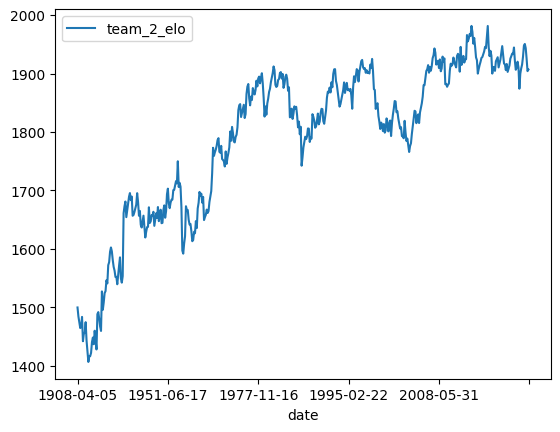

In [228]:
df[df["team_2"]=="Germany"].plot(x='date', y='team_2_elo')

<Axes: xlabel='team_1_time_diff', ylabel='team_1_elo'>

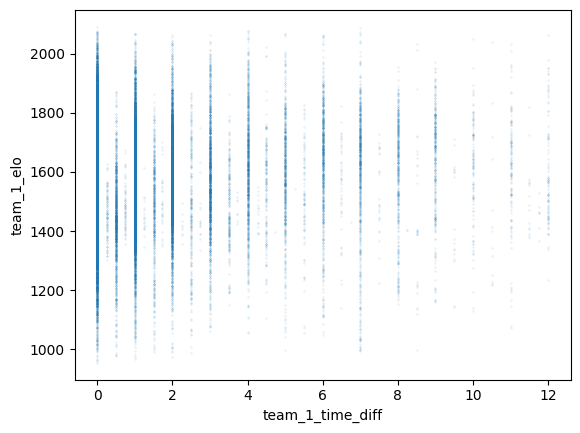

In [230]:
df.plot(x='team_1_time_diff', y='team_1_elo', kind='scatter', s=.05, alpha = .3)

In [310]:
econ = df[['team_1_gdp', 'team_2_gdp','p_score', 'team_1_time_diff', 'team_2_time_diff', 'team_1_elo', 'team_2_elo']].dropna()
econ['elo_effect'] = 1 / (1 + 10 ** ((econ['team_2_elo'] - econ['team_1_elo']) / 400))


In [298]:
econ.corr()

,team_1_gdp,team_2_gdp,p_score,team_1_time_diff,team_2_time_diff,team_1_elo,team_2_elo,elo_effect
team_1_gdp,1.000000,0.289021,0.040821,0.037665,0.080661,0.268471,0.208059,0.067740
team_2_gdp,0.289021,1.000000,-0.041205,0.070008,0.033291,0.210713,0.266475,-0.063674
p_score,0.040821,-0.041205,1.000000,-0.081923,0.075471,0.287603,-0.281202,0.538193
team_1_time_diff,0.037665,0.070008,-0.081923,1.000000,0.346417,0.050728,0.065255,-0.015427
team_2_time_diff,0.080661,0.033291,0.075471,0.346417,1.000000,0.057075,0.054328,0.004248
team_1_elo,0.268471,0.210713,0.287603,0.050728,0.057075,1.000000,0.447334,0.519182
team_2_elo,0.208059,0.266475,-0.281202,0.065255,0.054328,0.447334,1.000000,-0.514911
elo_effect,0.067740,-0.063674,0.538193,-0.015427,0.004248,0.519182,-0.514911,1.000000


In [301]:
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
# X = all the columns except p_score

X = econ[['team_1_time_diff', 'team_2_time_diff','team_1_gdp', 'team_2_gdp']]
X['team_1_gdp_sq'] = X['team_1_gdp'] ** 2
X['team_2_gdp_sq'] = X['team_2_gdp'] ** 2
X['elo_effect'] = econ['elo_effect']

# X['team_1_time_diff_sq'] = X['team_1_time_diff'] ** 2
# X['team_2_time_diff_sq'] = X['team_2_time_diff'] ** 2


# X['team_12_gdp'] = X['team_2_gdp'] * X['team_1_gdp']

y = econ['p_score']
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                p_score   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     1579.
Date:                Thu, 20 Nov 2025   Prob (F-statistic):               0.00
Time:                        21:13:03   Log-Likelihood:                 10950.
No. Observations:               25045   AIC:                        -2.188e+04
Df Residuals:                   25037   BIC:                        -2.182e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2669      0.003  

In [302]:
def incremental_r2(X, y):
    """
    Returns a dict mapping each predictor to its incremental (semi-partial) ΔR².
    """
    # Add constant if not already present
    if 'const' not in X.columns:
        X_full = sm.add_constant(X)
    else:
        X_full = X.copy()

    # Fit the full model
    full_model = sm.OLS(y, X_full).fit()

    results = {}

    for var in X.columns:
        # Build reduced design matrix that excludes the variable
        X_reduced = X_full.drop(columns=[var])
        
        reduced_model = sm.OLS(y, X_reduced).fit()
        
        # Incremental R² = R²(full) - R²(reduced)
        results[var] = full_model.rsquared - reduced_model.rsquared

    return results
inc_r2 = incremental_r2(X.drop(columns=['const']), y)
for var, delta_r2 in inc_r2.items():
    print(f"{var}: ΔR² = {delta_r2:.5f}")

team_1_time_diff: ΔR² = 0.01105
team_2_time_diff: ΔR² = 0.01086
team_1_gdp: ΔR² = 0.00015
team_2_gdp: ΔR² = 0.00005
team_1_gdp_sq: ΔR² = 0.00016
team_2_gdp_sq: ΔR² = 0.00003
elo_effect: ΔR² = 0.26284


In [ ]:
model.summary

<bound method NDFrame.to_latex of                          Coef.      Std.Err.          t      P>|t|  \
const             2.668570e-01  3.139132e-03  85.009806  0.000e+00   
team_1_time_diff -9.432421e-03  4.724126e-04 -19.966490  5.223e-88   
team_2_time_diff  9.411611e-03  4.753025e-04  19.801308  1.336e-86   
team_1_gdp        2.666992e-07  1.140966e-07   2.337486  1.942e-02   
team_2_gdp       -1.540258e-07  1.135860e-07  -1.356027  1.751e-01   
team_1_gdp_sq    -2.790974e-12  1.146326e-12  -2.434711  1.491e-02   
team_2_gdp_sq     1.188567e-12  1.145548e-12   1.037553  2.995e-01   
elo_effect        4.642167e-01  4.766074e-03  97.400235  0.000e+00   

                        [0.025        0.975]  
const             2.607041e-01  2.730099e-01  
team_1_time_diff -1.035838e-02 -8.506464e-03  
team_2_time_diff  8.479990e-03  1.034323e-02  
team_1_gdp        4.306313e-08  4.903352e-07  
team_2_gdp       -3.766611e-07  6.860954e-08  
team_1_gdp_sq    -5.037841e-12 -5.441065e-13  
team_2

In [312]:
econ['team_1_gdp_sq'] = econ['team_1_gdp'] ** 2
econ['team_2_gdp_sq'] = econ['team_2_gdp'] ** 2

In [317]:
print(econ[['p_score', 'team_1_time_diff', 'team_2_time_diff', 'team_1_gdp', 'team_2_gdp', 'team_1_gdp_sq', 'team_2_gdp_sq', 'elo_effect']].corr().to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
 & p_score & team_1_time_diff & team_2_time_diff & team_1_gdp & team_2_gdp & team_1_gdp_sq & team_2_gdp_sq & elo_effect \\
\midrule
p_score & 1.000000 & -0.081923 & 0.075471 & 0.040821 & -0.041205 & 0.002538 & -0.007683 & 0.538193 \\
team_1_time_diff & -0.081923 & 1.000000 & 0.346417 & 0.037665 & 0.070008 & 0.009361 & 0.035130 & -0.015427 \\
team_2_time_diff & 0.075471 & 0.346417 & 1.000000 & 0.080661 & 0.033291 & 0.046698 & 0.002862 & 0.004248 \\
team_1_gdp & 0.040821 & 0.037665 & 0.080661 & 1.000000 & 0.289021 & 0.919627 & 0.195419 & 0.067740 \\
team_2_gdp & -0.041205 & 0.070008 & 0.033291 & 0.289021 & 1.000000 & 0.191845 & 0.919244 & -0.063674 \\
team_1_gdp_sq & 0.002538 & 0.009361 & 0.046698 & 0.919627 & 0.191845 & 1.000000 & 0.133481 & 0.005475 \\
team_2_gdp_sq & -0.007683 & 0.035130 & 0.002862 & 0.195419 & 0.919244 & 0.133481 & 1.000000 & -0.004662 \\
elo_effect & 0.538193 & -0.015427 & 0.004248 & 0.067740 & -0.063674 & 0.005475 & -0.004662 & 1

In [250]:
pvals = model.pvalues

# Print with higher precision
print(pvals.apply(lambda x: f"{x:.2e}"))

const               0.00e+00
team_1_time_diff    5.22e-88
team_2_time_diff    1.34e-86
team_1_gdp          1.94e-02
team_2_gdp          1.75e-01
team_1_gdp_sq       1.49e-02
team_2_gdp_sq       2.99e-01
elo_effect          0.00e+00
dtype: object


In [248]:
print(model.summary().tables[1].as_latex_tabular())  # Coefficients table

\begin{center}
\begin{tabular}{lcccccc}
\toprule
                             & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{const}               &       0.2669  &        0.003     &    85.010  &         0.000        &        0.261    &        0.273     \\
\textbf{team\_1\_time\_diff} &      -0.0094  &        0.000     &   -19.966  &         0.000        &       -0.010    &       -0.009     \\
\textbf{team\_2\_time\_diff} &       0.0094  &        0.000     &    19.801  &         0.000        &        0.008    &        0.010     \\
\textbf{team\_1\_gdp}        &    2.667e-07  &     1.14e-07     &     2.337  &         0.019        &     4.31e-08    &      4.9e-07     \\
\textbf{team\_2\_gdp}        &    -1.54e-07  &     1.14e-07     &    -1.356  &         0.175        &    -3.77e-07    &     6.86e-08     \\
\textbf{team\_1\_gdp\_sq}    &   -2.791e-12  &     1.15e-12     &    -2.435  &         0.015        &  

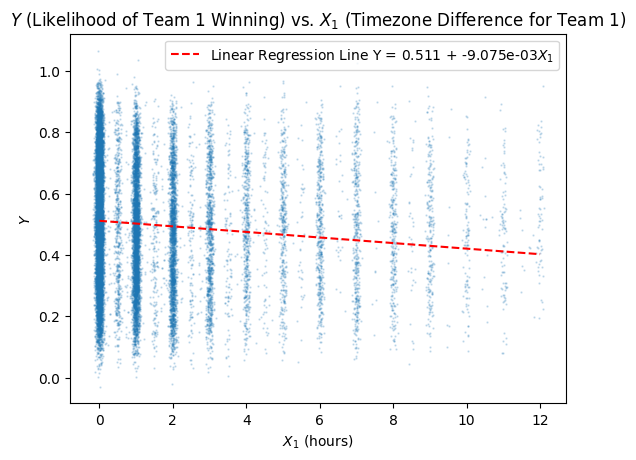

In [ ]:
import matplotlib.pyplot as plt
x = econ['team_1_time_diff']
y = econ['p_score']
x_j = x + np.random.normal(0, 0.05, size=len(x))
y_j = y + np.random.normal(0, 0.05, size=len(y))

plt.scatter(x_j, y_j, s=.5, alpha=0.2)
x_lin = np.linspace(x.min(), x.max(), 100)
sum_other_effects = 0
for col in X.columns:
    if col not in ['const', 'team_1_time_diff']:
        mean_val = X[col].mean()
        sum_other_effects += model.params[col] * mean_val
    
plt.plot(x_lin, model.params[0] + model.params[1]*x_lin + sum_other_effects, color='red', linestyle='--', label = 'Linear Regression Line Y = {:.3f} + {:.3e}$X_1$'.format(model.params[0] + sum_other_effects, model.params[1]))
# plt.grid(True)
plt.legend()
plt.xlabel('$X_1$ (hours)')
plt.ylabel('$Y$')
plt.title('$Y$ (Likelihood of Team 1 Winning) vs. $X_1$ (Timezone Difference for Team 1)')
plt.show()


In [251]:
def plot_with_jitter(ax, x, y, variable_of_interest,label, xlabel, ylabel, title):
    x_j = x + np.random.normal(0, 0.05, size=len(x))
    y_j = y + np.random.normal(0, 0.05, size=len(y))
    x_lin = np.linspace(x.min(), x.max(), 100)
    ax.scatter(x_j, y_j, s=.5, alpha=0.2)
    sum_other_effects = 0
    for col in X.columns:
        if col not in ['const', variable_of_interest]:
            mean_val = X[col].mean()
            sum_other_effects += model.params[col] * mean_val
        
    ax.plot(x_lin, model.params[0] + model.params[variable_of_interest]*x_lin + sum_other_effects, color='red', linestyle='--', label = 'LSRL Y = {:.3f} + {:.3e}{label}'.format(model.params[0] + sum_other_effects, model.params[variable_of_interest], label=label))
    ax.legend()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    
def plot_with_gdp_1_jitter(ax):
    variable_of_interest = 'team_1_gdp'
    x = econ['team_1_gdp']
    y = econ['p_score']
    x_lin = np.linspace(x.min(), x.max(), 100)
    x_j = x + np.random.normal(0, 0.05, size=len(x))
    y_j = y + np.random.normal(0, 0.05, size=len(y))
    ax.scatter(x_j, y_j, s=.5, alpha=0.2)
    sum_other_effects = 0
    for col in X.columns:
        if col not in ['const', variable_of_interest, 'team_1_gdp_sq']:
            mean_val = X[col].mean()
            sum_other_effects += model.params[col] * mean_val
        
    ax.plot(x_lin, model.params[0] + model.params[variable_of_interest]*x_lin + model.params['team_1_gdp_sq']* x_lin**2 + sum_other_effects, color='red', linestyle='--', label = 'LSRL Y = {:.3f} + {:.3e} $G_1$ + {:.3e} $G_1^2$'.format(model.params[0] + sum_other_effects, model.params[variable_of_interest],model.params['team_1_gdp_sq'] ))
    ax.legend()
    ax.set_xlabel("$G_1$ (\$/person)")
    ax.set_ylabel("$Y$")
    ax.set_title("$Y$ vs. $G_1$")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


def plot_with_gdp_2_jitter(ax):
    variable_of_interest = 'team_2_gdp'
    x = econ['team_2_gdp']
    y = econ['p_score']
    x_lin = np.linspace(x.min(), x.max(), 100)
    x_j = x + np.random.normal(0, 0.05, size=len(x))
    y_j = y + np.random.normal(0, 0.05, size=len(y))
    ax.scatter(x_j, y_j, s=.5, alpha=0.2)
    sum_other_effects = 0
    for col in X.columns:
        if col not in ['const', variable_of_interest, 'team_2_gdp_sq']:
            mean_val = X[col].mean()
            sum_other_effects += model.params[col] * mean_val
        
    ax.plot(x_lin, model.params[0] + model.params[variable_of_interest]*x_lin + model.params['team_2_gdp_sq']* x_lin**2 + sum_other_effects, color='red', linestyle='--', label = 'LSRL Y = {:.3f} + {:.3e} $G_2$ + {:.3e} $G_2^2$'.format(model.params[0] + sum_other_effects, model.params[variable_of_interest],model.params['team_2_gdp_sq'] ))
    ax.legend()
    ax.set_xlabel("$G_2$ (\$/person)")
    ax.set_ylabel("$Y$")
    ax.set_title("$Y$ vs. $G_2$")   
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)



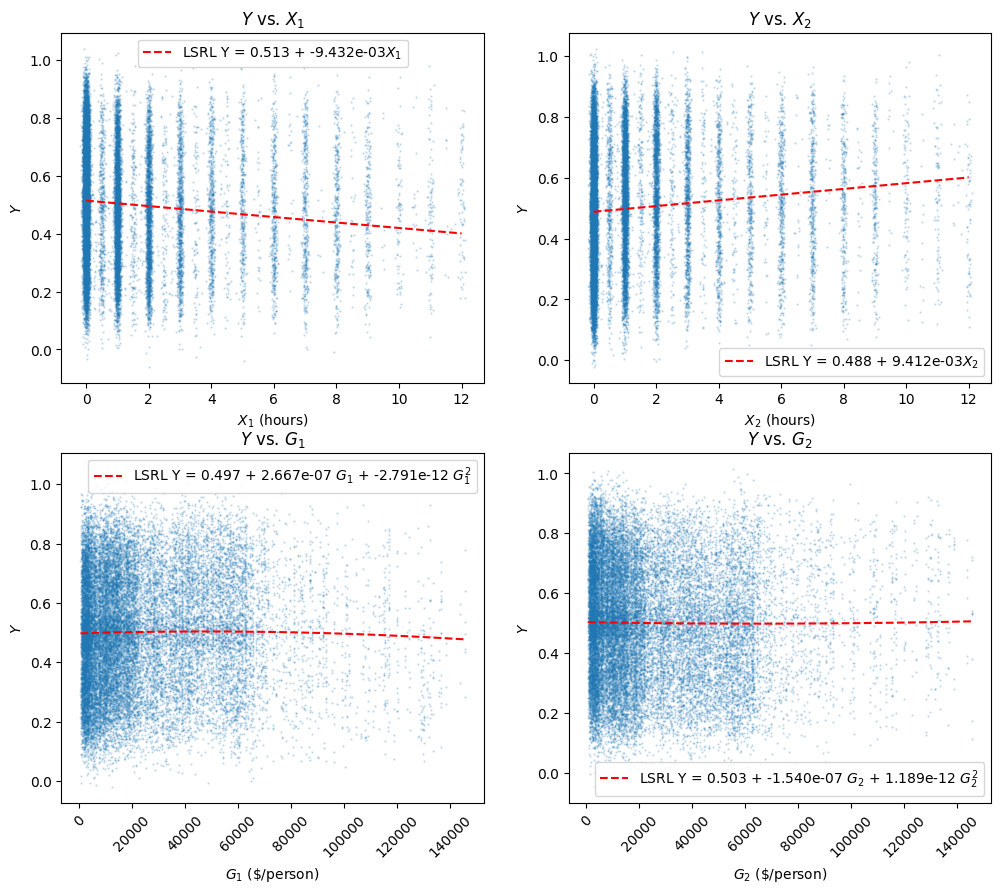

In [305]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

plot_with_jitter(
    axes[0,0],
    econ['team_1_time_diff'],
    econ['p_score'],
    variable_of_interest='team_1_time_diff',
    label='$X_1$',
    xlabel='$X_1$ (hours)',
    ylabel='$Y$',
    title="$Y$ vs. $X_1$"
)

plot_with_jitter(
    axes[0,1],
    econ['team_2_time_diff'],
    econ['p_score'],
    variable_of_interest='team_2_time_diff',
    label='$X_2$',
    xlabel='$X_2$ (hours)',
    ylabel='$Y$',
    title="$Y$ vs. $X_2$"
)

plot_with_gdp_1_jitter(axes[1, 0])
plot_with_gdp_2_jitter(axes[1, 1])
# bottom_ax = fig.add_axes([0.2, -0.05, 0.6, 0.3])  
# # [left, bottom, width, height] in figure coords (0–1)

# bottom_ax.plot([1, 2, 3])
# bottom_ax.set_title("Bottom Center Plot")
plt.savefig("plot.png", dpi=600, bbox_inches='tight')
plt.show()

Text(0, 0.5, 'Actual p_score')

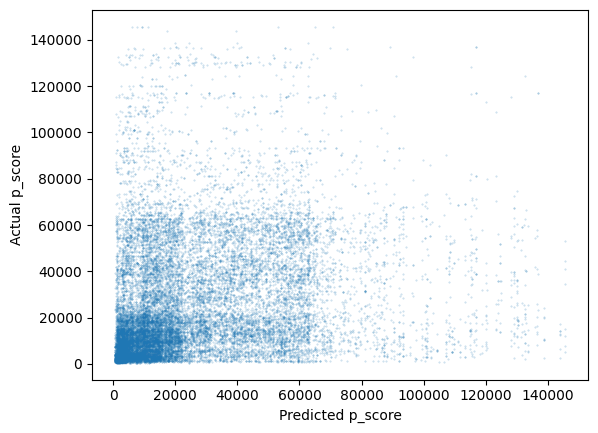

In [120]:
# graphing predicted vs actual
import matplotlib.pyplot as plt
# plt.scatter(econ['team_1_gdp'], y, s= .3, alpha=0.3)
plt.scatter(econ['team_1_gdp'], econ['team_2_gdp'], s= .15 ,alpha=0.3)

plt.xlabel("Predicted p_score")
plt.ylabel("Actual p_score")

In [296]:
#create an XGboost model to predict p_score
import xgboost as xgb
X = econ[['team_1_time_diff', 'team_2_time_diff','team_1_gdp', 'team_2_gdp','elo_effect']].dropna()
X['team_1_gdp_sq'] = X['team_1_gdp'] ** 2
X['team_2_gdp_sq'] = X['team_2_gdp'] ** 2
y = econ['p_score']

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# ----------------------------------------------------
# 1. Train / Test Split
# ----------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ----------------------------------------------------
# 2. Create the Regressor Model
# ----------------------------------------------------
model = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.03,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    eval_metric='rmse'
)

# ----------------------------------------------------
# 3. Fit the Model
# ----------------------------------------------------
model.fit(X_train, y_train)

# ----------------------------------------------------
# 4. Predict + Metrics
# ----------------------------------------------------
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
# rmse = mean_squared_error(y_train, y_pred) ** 0.5
# r2 = r2_score(y_train, y_pred)

metrics_df = pd.DataFrame({
    "Metric": ["MSE", "R²", "MAE"],
    "Value": [mse, r2, mae]
})
importance = model.get_booster().get_score(importance_type='gain')

feat_imp_df = pd.DataFrame({
    "Feature": list(importance.keys()),
    "Gain": list(importance.values())
}).sort_values("Gain", ascending=False)

# --- EXPORT BOTH TO LATEX ---

metrics_latex = metrics_df.to_latex(
    index=False,
    float_format="%.4f",
    caption="XGBoost Training Metrics",
    label="tab:xgb_metrics"
)

feat_imp_latex = feat_imp_df.to_latex(
    index=False,
    float_format="%.4f",
    caption="XGBoost Feature Importance (Gain)",
    label="tab:xgb_featimp"
)

print(metrics_latex)
print(feat_imp_latex)

KeyError: "['team_1_gdp', 'team_2_gdp'] not in index"

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd

y_pred = model.predict(X_train)



  Metric     Value
0   RMSE  0.136890
1     R²  0.465900
2    MAE  0.111337


In [36]:
X = pd.DataFrame()
X['elo_effect'] = 1 / (1 + 10 ** ((econ['team_2_elo'] - econ['team_1_elo']) / 400))
# X['team_12_gdp'] = X['team_2_gdp'] * X['team_1_gdp']

y = econ['p_score']
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                p_score   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     8979.
Date:                Wed, 19 Nov 2025   Prob (F-statistic):               0.00
Time:                        19:46:19   Log-Likelihood:                 10210.
No. Observations:               25045   AIC:                        -2.042e+04
Df Residuals:                   25043   BIC:                        -2.040e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2562      0.003     93.538      0.0

In [95]:
# X = econ[['team_1_gdp','team_2_gdp','team_1_time_diff','team_2_time_diff']]
X = pd.DataFrame()
X['gdp_diff'] = econ['team_1_gdp'] - econ['team_2_gdp']
X['time_diff'] = econ['team_1_time_diff'] - econ['team_2_time_diff']
X['gdp_diff_sq'] = X['gdp_diff'] ** 2
X['time_diff_sq'] = X['time_diff'] ** 2
y = econ['p_score']
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                p_score   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     142.2
Date:                Wed, 19 Nov 2025   Prob (F-statistic):          1.87e-120
Time:                        01:21:25   Log-Likelihood:                 6651.0
No. Observations:               25045   AIC:                        -1.329e+04
Df Residuals:                   25040   BIC:                        -1.325e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5010      0.001    379.228   

Text(0.5, 1.0, 'Distrubtion of E[Y_hat]')

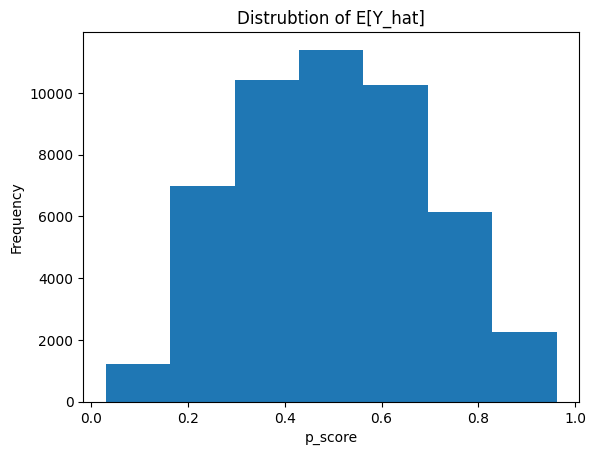

In [109]:
#plot a histogram of p_score
import matplotlib.pyplot as plt
plt.hist(df['p_score'], bins=7)
plt.xlabel('p_score')
plt.ylabel('Frequency')
plt.title('Distrubtion of E[Y_hat]')   


Text(0.5, 1.0, 'Histogram of Effective Time Zone Difference')

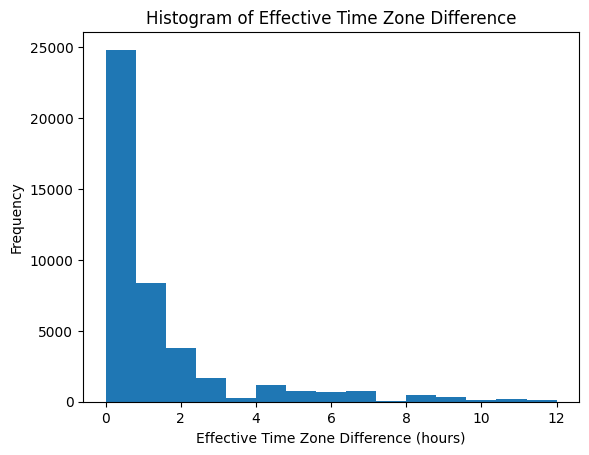

In [110]:
#plot a histogram of p_score
import matplotlib.pyplot as plt
plt.hist(df['team_1_time_diff'], bins=15)
plt.xlabel('Effective Time Zone Difference (hours)')
plt.ylabel('Frequency')
plt.title('Histogram of Effective Time Zone Difference')  